**FINAL EXCERCISE**

In this final exercise I developed a tool to visualise the travel times in the Helsinki Metropolitan area. This solution is general and you can replicate this with your own point of interest. All you need is to download the data from https://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix/ (also more info ca be found here). The code works with 2018 data. You should unzip the data and save the in a folder called data, under the same folder as script or notebook file. 

The Helsinki Travel Time data contains travel time and distance information from the Metropolitan area. The 2018 version has bike, public transport, car and walking information. Years 2013 and 2015 have information lack information about the bike but otherwise have the same transport methods. The functions can be easily changed to fit any of the data by changing column names (that vary from year to year) or even to ask user with which year's data is (s)he working with and then with if/elif statement pick the right column name. 

The data consist of 250m x 250m grid cells and this grid is compatible with the YKR population grid that can be downloaded from the same address with population information. YKR grid gives the spatial extent for the grid cells since the travel time matrix only contains the YKR ID number and therefore a table join with YKR grid is necessary in order to visualise the travel times. Therefore, when replicating the analysis, you should also save the shapefile YKR grid (total of 7 files) to a folder called data under the same folder as your Python script or Jupiter notebook.

My original idea was to analyse the development of bike routes in 2010s but as the previous years were lacking the bike data I will just compare biking and public transport as feasible transportation methods for a university student. For this, I have chosen campuses around the Metropolitan area and will compare the travel times to campuses with bike and public transport. 

to do: 
- make additions to file finder
- different years
- shortest path
- bike amounts
- work flow chart



In [ ]:
#API link for bike count data
https://services1.arcgis.com/sswNXkUiRoWtrx0t/arcgis/rest/services/Helsingin_seudun_py%C3%B6r%C3%A4laskennat/FeatureServer/0/query?where=1%3D1&outFields=FID,Id,Paikka,ka_2013,ka_2018&outSR=4326&f=json

The project has several dependencies for handling the data and visualising it. If the first cell is giving you an error, you need to install some of the dependencies. **Folium package does not run well in Chrome, so if the interactive maps are not displaying, change your browser** (worked with Safari for me).

In [51]:
#import modules and dependencies
#If this is giving an error about scalebar, run: "pip install matplotlib-scalebar" in the terminal
import pandas as pd
import geopandas as gpd
import numpy as np
import mapclassify
import matplotlib.pyplot as plt
import folium
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx

%run Final_assignment

Before starting your own analysis, you want to check what is the YKR id of the place of interest(s). By running the CellChecker function you get an interactive map where you can pan and zoom and see the id numbers of places while hovering over. 

In [13]:
CellChecker()

The file finder function searches for files in the dowloaded Travel Time Matrix and builds the filepaths to find the data for desired YKR ids. 

In [41]:
filepaths = FileFinder([5949389, 5931308, 5960104, 5961860, 5972102, 5975376])

Processing file data/5949/travel_times_to_ 5949389.txt. Progress: 1/6
Processing file data/5931/travel_times_to_ 5931308.txt. Progress: 2/6
Processing file data/5960/travel_times_to_ 5960104.txt. Progress: 3/6
Processing file data/5961/travel_times_to_ 5961860.txt. Progress: 4/6
Processing file data/5972/travel_times_to_ 5972102.txt. Progress: 5/6
Processing file data/5975/travel_times_to_ 5975376.txt. Progress: 6/6


In order to visualise the data, the travel time files need to be joined with the YKR grid (to attain the geometry information). Below you can see a table which has the travel time values for bike, public transport and car for each destination. Destinations are numbered in the order you had inserted them. Last columns calculate what is the minimum travel time to any of the chosen destinations by chosen transport.

In [43]:
geodata = TableJoiner(filepaths)
geodata

x          y   YKR_ID  \
0      381875.0  6697880.0  5785640   
1      382125.0  6697880.0  5785641   
2      382375.0  6697880.0  5785642   
3      382625.0  6697880.0  5785643   
4      381125.0  6697630.0  5787544   
...         ...        ...      ...   
12885  372875.0  6665630.0  6016698   
12886  373125.0  6665630.0  6016699   
12887  372375.0  6665380.0  6018252   
12888  372625.0  6665380.0  6018253   
12889  372875.0  6665380.0  6018254   

                                                geometry  bike_f_t_0  \
0      POLYGON ((382000.000 6697750.000, 381750.000 6...        79.0   
1      POLYGON ((382250.000 6697750.000, 382000.000 6...        78.0   
2      POLYGON ((382500.000 6697750.000, 382250.000 6...        78.0   
3      POLYGON ((382750.000 6697750.000, 382500.000 6...        80.0   
4      POLYGON ((381250.000 6697500.000, 381000.000 6...        77.0   
...                                                  ...         ...   
12885  POLYGON ((373000.000 6665500.000, 372750.000 6...        71.0   
12886  POLYGON ((373250.000 6665500.000, 373000.000 6...        71.0   
12887  POLYGON ((372500.000 6665250.000, 372250.000 6...        73.0   
12888  POLYGON ((372750.000 6665250.000, 372500.000 6...        72.0   
12889  POLYGON ((373000.000 6665250.000, 372750.000 6...        72.0   

       pt_r_t_0  car_r_t_0  bike_f_t_1  pt_r_t_1  car_r_t_1  ...  car_r_t_3  \
0         127.0       56.0        77.0       120       54.0  ...       54.0   
1         130.0       56.0        75.0       123       54.0  ...       56.0   
2         132.0       56.0        75.0       125       54.0  ...       56.0   
3         136.0       56.0        73.0       129       54.0  ...       56.0   
4         120.0       55.0        75.0       113       53.0  ...       53.0   
...         ...        ...         ...       ...        ...  ...        ...   
12885      84.0       65.0        83.0        93       68.0  ...       41.0   
12886      86.0       65.0        82.0        94       68.0  ...       41.0   
12887      87.0       66.0        84.0        96       69.0  ...       43.0   
12888      89.0       66.0        84.0        98       69.0  ...       42.0   
12889      87.0       66.0        84.0        96       69.0  ...       42.0   

       bike_f_t_4  pt_r_t_4  car_r_t_4  bike_f_t_5  pt_r_t_5  car_r_t_5  \
0            84.0       119       65.0        85.0       115       63.0   
1            84.0       122       66.0        84.0       118       65.0   
2            84.0       124       66.0        84.0       120       65.0   
3            89.0       128       67.0        90.0       124       65.0   
4            83.0       112       64.0        83.0       108       62.0   
...           ...       ...        ...         ...       ...        ...   
12885        66.0        73       54.0        64.0        67       52.0   
12886        66.0        75       54.0        64.0        69       52.0   
12887        68.0        77       55.0        66.0        71       53.0   
12888        67.0        78       55.0        66.0        72       53.0   
12889        67.0        76       55.0        66.0        71       53.0   

       min_t_bike  min_t_car  min_t_pt  
0            77.0       51.0     115.0  
1            75.0       54.0     118.0  
2            75.0       54.0     120.0  
3            73.0       54.0     124.0  
4            75.0       51.0     108.0  
...           ...        ...       ...  
12885        46.0       41.0      55.0  
12886        46.0       41.0      57.0  
12887        48.0       43.0      59.0  
12888        48.0       42.0      60.0  
12889        48.0       42.0      58.0  

[12889 rows x 25 columns]

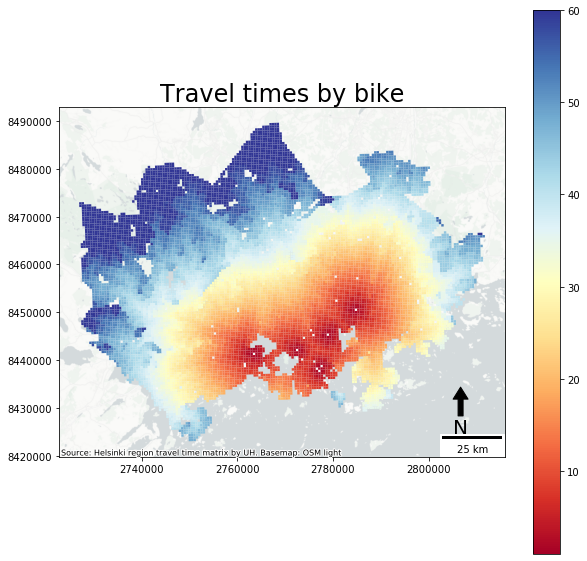

In [52]:
Visualiser(geodata, "bike")

'outputs/traveltimes_comparison_bike.png'

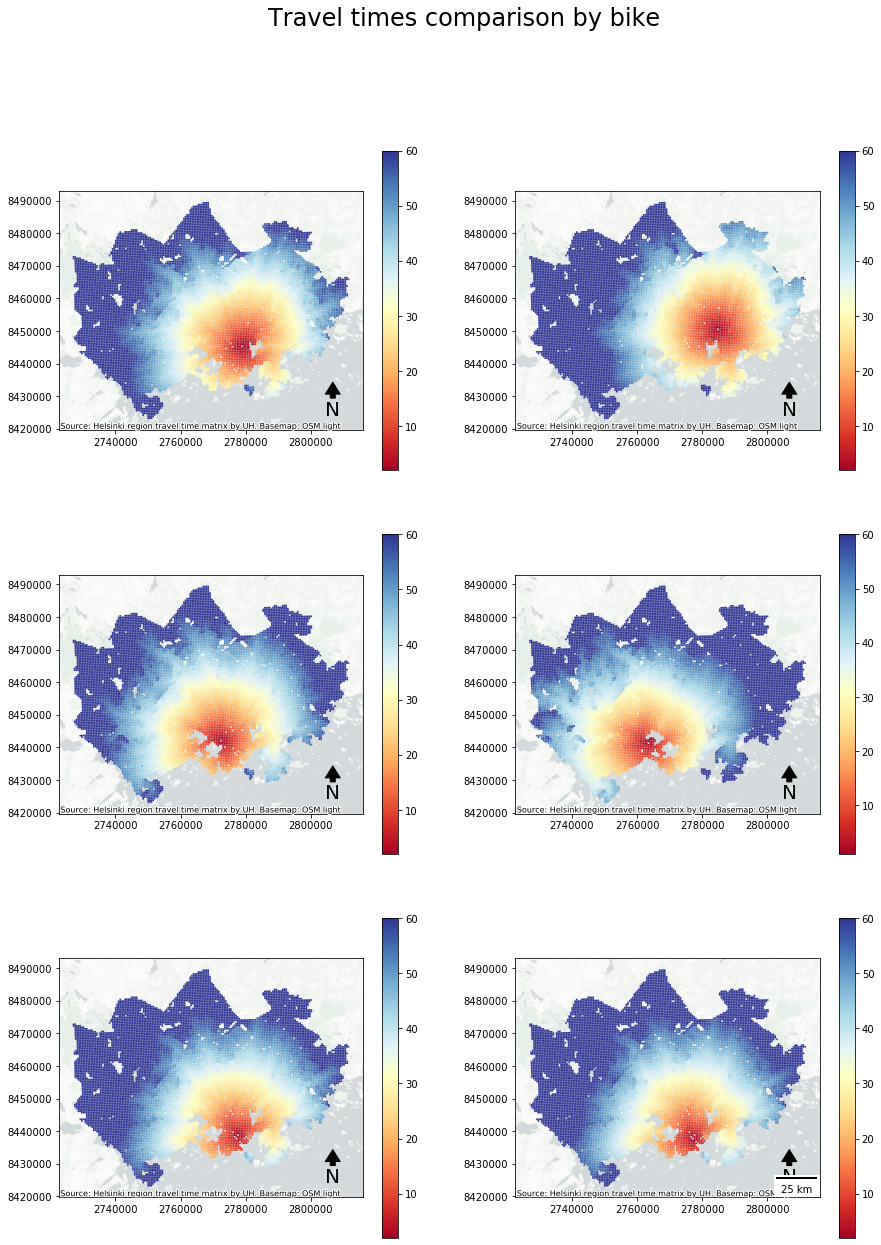

In [44]:
MultipleMaps(geodata, "bike", 2,3)